**Tools - NumPy**

*NumPy is the fundamental library for scientific computing with Python. NumPy is centered around a powerful N-dimensional array object, and it also contains useful linear algebra, Fourier transform, and random number functions.*

# Creating arrays
First let's make sure that this notebook works both in python 2 and 3:

In [1]:
from __future__ import division, print_function, unicode_literals

Now let's import `numpy`. Most people import it as `np`:

In [2]:
import numpy as np

## `np.zeros`

The `zeros` function creates an array containing any number of zeros:

In [46]:
# 返回全0的ndarray，参数指定ndarray的形状
np.zeros(5)

array([0., 0., 0., 0., 0.])

It's just as easy to create a 2D array (ie. a matrix) by providing a tuple with the desired number of rows and columns. For example, here's a 3x4 matrix:

In [47]:
# 返回全0的ndarray，参数指定ndarray的形状（3行、4列）
np.zeros((3,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

## Some vocabulary

* In NumPy, each dimension is called an **axis**.
* The number of axes is called the **rank**.
    * For example, the above 3x4 matrix is an array of rank 2 (it is 2-dimensional).
    * The first axis has length 3, the second has length 4.
* An array's list of axis lengths is called the **shape** of the array.
    * For example, the above matrix's shape is `(3, 4)`.
    * The rank is equal to the shape's length.
* The **size** of an array is the total number of elements, which is the product of all axis lengths (eg. 3*4=12)

In [48]:
# 2阶的ndarray，两根轴(axis)一根长度是3一根长度是2，形状是(3，4)即3行4列(4是最内层数组的长度)
a = np.zeros((3,4))
a

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [49]:
a.shape

(3, 4)

In [7]:
# 返回轴(axis)的数量
a.ndim

2

In [8]:
# 返回元素的数量(3*4=12)
a.size

12

## N-dimensional arrays
You can also create an N-dimensional array of arbitrary rank. For example, here's a 3D array (rank=3), with shape `(2,3,4)`:

In [50]:
# 生成一个3阶的ndarray
np.zeros((2,3,4))

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

## Array type
NumPy arrays have the type `ndarray`s:

In [51]:
# ndarray元素的数据类型
type(np.zeros((3,4)))

numpy.ndarray

## `np.ones`
Many other NumPy functions create `ndarrays`.

Here's a 3x4 matrix full of ones:

In [52]:
# 全1的(3,4)形状的ndarray
np.ones((3,4))

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

## `np.full`
Creates an array of the given shape initialized with the given value. Here's a 3x4 matrix full of `π`.

In [53]:
# 返回元素都是指定数值的ndarray
np.full((3,4), np.pi)

array([[3.14159265, 3.14159265, 3.14159265, 3.14159265],
       [3.14159265, 3.14159265, 3.14159265, 3.14159265],
       [3.14159265, 3.14159265, 3.14159265, 3.14159265]])

## `np.empty`
An uninitialized 2x3 array (its content is not predictable, as it is whatever is in memory at that point):

In [54]:
# 返回指定形状的ndarray，元素值不固定（取决于内存中残留的数据），因此也没有元素初始化的赋值开销
np.empty((2,3))

array([[0. , 0.2, 0.4],
       [0.6, 0.8, 1. ]])

## np.array
Of course you can initialize an `ndarray` using a regular python array. Just call the `array` function:

In [55]:
# 用传python多维数组的方式初始化ndarray
np.array([[1,2,3,4], [10, 20, 30, 40]])

array([[ 1,  2,  3,  4],
       [10, 20, 30, 40]])

## `np.arange`
You can create an `ndarray` using NumPy's `range` function, which is similar to python's built-in `range` function:

In [56]:
# 用指定范围的方式初始化int类型的ndarray
np.arange(1, 5)

array([1, 2, 3, 4])

It also works with floats:

In [57]:
# 用指定范围的方式初始化float类型的ndarray
np.arange(1.0, 5.0)

array([1., 2., 3., 4.])

Of course you can provide a step parameter:

In [58]:
# 用指定（起点、终点、步长）的方式初始化float类型的ndarray
np.arange(1, 5, 0.5)

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

However, when dealing with floats, the exact number of elements in the array is not always predictible. For example, consider this:

In [59]:
# 用np.arrange(...)生成的数组不保证一定能包含max，取决于整除步长之后的值
print(np.arange(0, 5/3, 1/3)) # depending on floating point errors, the max value is 4/3 or 5/3.
print(np.arange(0, 5/3, 0.333333333))
print(np.arange(0, 5/3, 0.333333334))

[0.         0.33333333 0.66666667 1.         1.33333333 1.66666667]
[0.         0.33333333 0.66666667 1.         1.33333333 1.66666667]
[0.         0.33333333 0.66666667 1.         1.33333334]


## `np.linspace`
For this reason, it is generally preferable to use the `linspace` function instead of `arange` when working with floats. The `linspace` function returns an array containing a specific number of points evenly distributed between two values (note that the maximum value is *included*, contrary to `arange`):

In [60]:
# 更推荐使用np.linspace(...)，保证一定包含max，保证一定返回(参数3)指定的元素个数（步长按需计算）
print(np.linspace(0, 5/3, 6))

[0.         0.33333333 0.66666667 1.         1.33333333 1.66666667]


## `np.rand` and `np.randn`
A number of functions are available in NumPy's `random` module to create `ndarray`s initialized with random values.
For example, here is a 3x4 matrix initialized with random floats between 0 and 1 (uniform distribution):

In [61]:
# 在3*4的ndarray中填充[0,1]内均匀分布的随机数
np.random.rand(3,4)

array([[0.21483432, 0.04146723, 0.44321496, 0.57118514],
       [0.43134948, 0.67507011, 0.21553437, 0.7922913 ],
       [0.07335763, 0.32257723, 0.97563369, 0.87584748]])

Here's a 3x4 matrix containing random floats sampled from a univariate [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) (Gaussian distribution) of mean 0 and variance 1:

In [62]:
# 在3*4的ndarray中填充以0为中心正态分布的随机数
np.random.randn(3,4)

array([[ 0.29896161,  0.78392921, -0.36813649, -0.28132717],
       [ 0.6441738 ,  1.39758853,  0.65766948,  0.70948002],
       [-0.5123529 , -0.15728418,  0.46070018, -0.21261928]])

To give you a feel of what these distributions look like, let's use matplotlib (see the [matplotlib tutorial](tools_matplotlib.ipynb) for more details):

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt

np.random.rand()与np.random.randn()生成随机数的数学分布不一样

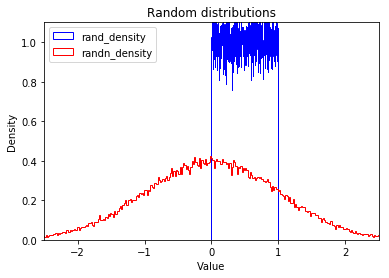

In [73]:
# x = np.random.rand(100000) 
# density = True:  纵坐标为概率密度
# bins = 500: 500根柱子
# histtype = bar(条形直方图), barstacked(堆叠的条形直方图), step(默认未填充的线图), stepfilled(默认填充的线图)
plt.hist(np.random.rand(100000),  density=True, bins=500, histtype="step", color="blue", label="rand_density" )
plt.hist(np.random.randn(100000), density=True, bins=500, histtype="step", color="red",  label="randn_density")

# 图的坐标取值范围
plt.axis([-2.5, 2.5, 0, 1.1]) 
# 图例显示位置
plt.legend(loc = "upper left")
# 标题及坐标轴名称
plt.title("Random distributions")
plt.xlabel("Value")
plt.ylabel("Density")
# 绘图
plt.show()

不指定density=True时

In [88]:
# rand和randn
rand_ret  = np.random.rand(100000)
randn_ret = np.random.randn(100000)
print(rand_ret.shape,  rand_ret.max(),  rand_ret.min())  #rand_ret : 值域在[0,1]范围内的10000个数字
print(randn_ret.shape, randn_ret.max(), randn_ret.min()) #randn_ret: 值域以0为中心呈正态分布的10000个数字

(100000,) 0.999999545982139 1.2248810512538455e-06
(100000,) 4.128790252827876 -4.563377983654158


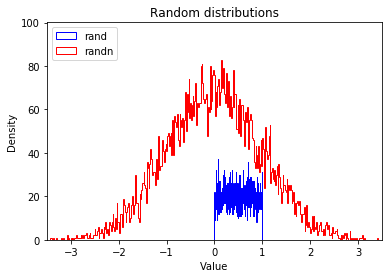

In [94]:
# x = np.random.rand(100000) 
# density = False:  纵坐标为样本数量
# bins = 500: 500根柱子
# histtype = bar(条形直方图), barstacked(堆叠的条形直方图), step(默认未填充的线图), stepfilled(默认填充的线图)
plt.hist(np.random.rand(10000),  density=False, bins=500, histtype="step", color="blue", label="rand" )
plt.hist(np.random.randn(10000), density=False, bins=500, histtype="step", color="red",  label="randn")

# 图的坐标取值范围
plt.axis([-3.5, 3.5, 0, 100.1]) 
# 图例显示位置
plt.legend(loc = "upper left")
# 标题及坐标轴名称
plt.title("Random distributions")
plt.xlabel("Value")
plt.ylabel("Density")
# 绘图
plt.show()

## np.fromfunction
You can also initialize an `ndarray` using a function:

In [95]:
# 参数：坐标值
# 返回：根据坐标值计算得到的元素值
def my_function(z, y, x):
    return x * y + z

# 创建一个3*2*10的ndarray，Z轴[0,1,2]，Y轴[0,1]，X轴[0,1,2,...,9]
# 由my_function根据坐标轴来填充ndarray的元素
np.fromfunction(my_function, (3, 2, 10))

array([[[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]],

       [[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]],

       [[ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
        [ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]]])

NumPy first creates three `ndarrays` (one per dimension), each of shape `(2, 10)`. Each array has values equal to the coordinate along a specific axis. For example, all elements in the `z` array are equal to their z-coordinate:

    [[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
      [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
    
     [[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
      [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]
    
     [[ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
      [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]]]

So the terms x, y and z in the expression `x * y + z` above are in fact `ndarray`s (we will discuss arithmetic operations on arrays below).  The point is that the function `my_function` is only called *once*, instead of once per element. This makes initialization very efficient.

# Array data
## `dtype`
NumPy's `ndarray`s are also efficient in part because all their elements must have the same type (usually numbers).
You can check what the data type is by looking at the `dtype` attribute:

In [96]:
# dtype表示ndarray元素的类型
c = np.arange(1, 5)
print(c.dtype, c)

int64 [1 2 3 4]


In [97]:
# dtype表示ndarray元素的类型
c = np.arange(1.0, 5.0)
print(c.dtype, c)

float64 [1. 2. 3. 4.]


Instead of letting NumPy guess what data type to use, you can set it explicitly when creating an array by setting the `dtype` parameter:

In [98]:
# 显式地指定ndarray元素的类型(dtype)
d = np.arange(1, 5, dtype=np.complex64)
print(d.dtype, d)

complex64 [1.+0.j 2.+0.j 3.+0.j 4.+0.j]


Available data types include `int8`, `int16`, `int32`, `int64`, `uint8`|`16`|`32`|`64`, `float16`|`32`|`64` and `complex64`|`128`. Check out [the documentation](http://docs.scipy.org/doc/numpy-1.10.1/user/basics.types.html) for the full list.

## `itemsize`
The `itemsize` attribute returns the size (in bytes) of each item:

In [99]:
#itemsize表示ndarray每个元素的字节数
e = np.arange(1, 5, dtype=np.complex64)
e.itemsize

8

## `data` buffer
An array's data is actually stored in memory as a flat (one dimensional) byte buffer. It is available *via* the `data` attribute (you will rarely need it, though).

In [100]:
#存储ndarray元素的底层数据结构
f = np.array([[1,2],[1000, 2000]], dtype=np.int32)
f.data

In python 2, `f.data` is a buffer. In python 3, it is a memoryview.

In [101]:
if (hasattr(f.data, "tobytes")):
    data_bytes = f.data.tobytes() # python 3
else:
    data_bytes = memoryview(f.data).tobytes() # python 2

data_bytes

b'\x01\x00\x00\x00\x02\x00\x00\x00\xe8\x03\x00\x00\xd0\x07\x00\x00'

Several `ndarrays` can share the same data buffer, meaning that modifying one will also modify the others. We will see an example in a minute.

# Reshaping an array
## In place
Changing the shape of an `ndarray` is as simple as setting its `shape` attribute. However, the array's size must remain the same.

In [102]:
#1维ndarray
g = np.arange(24)
print(g)
print("Rank:", g.ndim)
print("Shape:",g.shape)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Rank: 1
Shape: (24,)


In [103]:
#2维ndarray
g.shape = (6, 4)
print(g)
print("Rank:", g.ndim)
print("Shape:",g.shape)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]
Rank: 2
Shape: (6, 4)


In [104]:
#3维ndarray
g.shape = (2, 3, 4)
print(g)
print("Rank:", g.ndim)
print("Shape:",g.shape)

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
Rank: 3
Shape: (2, 3, 4)


## `reshape`
The `reshape` function returns a new `ndarray` object pointing at the *same* data. This means that modifying one array will also modify the other.

In [105]:
# reshape会返回一个新的shape的ndarray，但数据存储与原ndarray是共用的
g2 = g.reshape(4,6)
print(g2)
print("Rank:", g2.ndim)
print("Shape:",g2.shape)

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]
Rank: 2
Shape: (4, 6)


Set item at row 1, col 2 to 999 (more about indexing below).

In [106]:
# 修改reshape返回的ndarray
g2[1, 2] = 999
g2

array([[  0,   1,   2,   3,   4,   5],
       [  6,   7, 999,   9,  10,  11],
       [ 12,  13,  14,  15,  16,  17],
       [ 18,  19,  20,  21,  22,  23]])

The corresponding element in `g` has been modified.

In [108]:
# 修改可以体现在reshape之前的原始ndarray中
g

array([[[  0,   1,   2,   3],
        [  4,   5,   6,   7],
        [999,   9,  10,  11]],

       [[ 12,  13,  14,  15],
        [ 16,  17,  18,  19],
        [ 20,  21,  22,  23]]])

## `ravel`
Finally, the `ravel` function returns a new one-dimensional `ndarray` that also points to the same data:

In [109]:
#g.ravel()等价于g.reshape(g.size)
#返回一个一阶的ndarray，长度是g.size，但是指向的元素底层存储与g相同
g.ravel()

array([  0,   1,   2,   3,   4,   5,   6,   7, 999,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23])

In [110]:
#与g.ravel()等价，但g.ravel()调用起来更方便，g.reshape(g.size)表意更直白
g.reshape(g.size)

array([  0,   1,   2,   3,   4,   5,   6,   7, 999,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23])

# Arithmetic operations
All the usual arithmetic operators (`+`, `-`, `*`, `/`, `//`, `**`, etc.) can be used with `ndarray`s. They apply *elementwise*:

In [111]:
a = np.array([14, 23, 32, 41])
b = np.array([5,  4,  3,  2])
print("a + b  =", a + b)
print("a - b  =", a - b)
print("a * b  =", a * b)   # 相同下标元素相乘，不是矩阵乘法
print("a / b  =", a / b)   # 相同下标元素浮点数相乘
print("a // b  =", a // b) # 相同下标元素整数相乘
print("a % b  =", a % b)
print("a ** b =", a ** b)

a + b  = [19 27 35 43]
a - b  = [ 9 19 29 39]
a * b  = [70 92 96 82]
a / b  = [ 2.8         5.75       10.66666667 20.5       ]
a // b  = [ 2  5 10 20]
a % b  = [4 3 2 1]
a ** b = [537824 279841  32768   1681]


Note that the multiplication is *not* a matrix multiplication. We will discuss matrix operations below.

The arrays must have the same shape. If they do not, NumPy will apply the *broadcasting rules*.

# Broadcasting

**两个ndarray做数学运算时，如果shape不一致，numpy会尝试用"广播(Broadcasting)"的方式来让shape对齐起来**

In general, when NumPy expects arrays of the same shape but finds that this is not the case, it applies the so-called *broadcasting* rules:

## First rule

**ndarray数学运算时，会用补1的方法自动把rank对齐**

*If the arrays do not have the same rank, then a 1 will be prepended to the smaller ranking arrays until their ranks match.*

In [115]:
h = np.arange(5).reshape(1, 1, 5)
h

array([[[0, 1, 2, 3, 4]]])

Now let's try to add a 1D array of shape `(5,)` to this 3D array of shape `(1,1,5)`. Applying the first rule of broadcasting!

In [116]:
h + [10, 20, 30, 40, 50]  # same as: h + [[[10, 20, 30, 40, 50]]]

array([[[10, 21, 32, 43, 54]]])

In [119]:
h + [[[10, 20, 30, 40, 50]]]

array([[[10, 21, 32, 43, 54]]])

## Second rule

**ndarray数学运算时，如果某个demension在另一个ndarray中对应在一个单元素数组上，这个元素会自动复制多份**

*Arrays with a 1 along a particular dimension act as if they had the size of the array with the largest shape along that dimension. The value of the array element is repeated along that dimension.*

In [117]:
k = np.arange(6).reshape(2, 3)
k

array([[0, 1, 2],
       [3, 4, 5]])

Let's try to add a 2D array of shape `(2,1)` to this 2D `ndarray` of shape `(2, 3)`. NumPy will apply the second rule of broadcasting:

In [42]:
k + [[100], [200]]  # same as: k + [[100, 100, 100], [200, 200, 200]]

array([[100, 101, 102],
       [203, 204, 205]])

In [118]:
k + [[100, 100, 100], [200, 200, 200]]

array([[100, 101, 102],
       [203, 204, 205]])

**Combining rules 1 & 2, we can do this:**

In [133]:
print("--- k.shape ------------------\n", k.shape)
print("--- k + [100,200,300] --------\n", k)
print("--- k + [[100,200,300]] ------\n", k + [[100,200,300]])
print("--- k + [[100,200,300],[100,200,300]] ------\n", k + [[100,200,300]])
k + [100, 200, 300]  # after rule 1: [[100, 200, 300]], and after rule 2: [[100, 200, 300], [100, 200, 300]]

--- k.shape ------------------
 (2, 3)
--- k + [100,200,300] --------
 [[0 1 2]
 [3 4 5]]
--- k + [[100,200,300]] ------
 [[100 201 302]
 [103 204 305]]
--- k + [[100,200,300],[100,200,300]] ------
 [[100 201 302]
 [103 204 305]]


array([[100, 201, 302],
       [103, 204, 305]])

And also, very simply:

In [137]:
# 广播两轮：第一轮 1000 -> [1000,1000,1000]；第二轮 [1000,1000,1000] -> [[1000,1000,1000], [1000,1000,1000]]
# same as: k + [[1000, 1000, 1000], [1000, 1000, 1000]]
k + 1000  

array([[1000, 1001, 1002],
       [1003, 1004, 1005]])

## Third rule
*After rules 1 & 2, the sizes of all arrays must match.*

In [145]:
# 当无法通过广播把一个nparray映射到另一个nparray上时（例如下面的例子，无法把[33,44]映射成[a,a,a]
print("---k---\n", k, "\n")
print("---[33,44]---\n", [33,44], "\n---")
print("k.shape:",k.shape,"; [33,44].shape:",np.array([33,44]).shape)
try:
    k + [33, 44]
except ValueError as e:
    print(e)

---k---
 [[0 1 2]
 [3 4 5]] 

---[33,44]---
 [33, 44] 
---
k.shape: (2, 3) ; [33,44].shape: (2,)
operands could not be broadcast together with shapes (2,3) (2,) 


In [146]:
# 上面的例子改一下，[33]可以广播成[33,33,33]，[44]可以广播成[44,44,44]，可以正确执行
k + [[33],[44]]

array([[33, 34, 35],
       [47, 48, 49]])

**Broadcasting** rules are used in many NumPy operations, not just arithmetic operations, as we will see below.
For more details about broadcasting, check out [the documentation](https://docs.scipy.org/doc/numpy-dev/user/basics.broadcasting.html).

## Upcasting

**当两个np.array元素类型不相同时，会通过upcasting把类型转换成一个更宽泛、两个np.array都能覆盖的类型**

When trying to combine arrays with different `dtype`s, NumPy will *upcast* to a type capable of handling all possible values (regardless of what the *actual* values are).

In [147]:
# k1元素类型是uint8
k1 = np.arange(0, 5, dtype=np.uint8)
print(k1.dtype, k1)
# k2元素类型是int8
k2 = np.array([5, 6, 7, 8, 9], dtype=np.int8)
print(k2.dtype, k2)

uint8 [0 1 2 3 4]
int8 [5 6 7 8 9]


In [148]:
# k3 = k1 + k2，元素类型被upcast成int16，它可以同时覆盖uint8和int8
k3 = k1 + k2
print(k3.dtype, k3)

int16 [ 5  7  9 11 13]


Note that `int16` is required to represent all *possible* `int8` and `uint8` values (from -128 to 255), even though in this case a uint8 would have sufficed.

In [149]:
# k4元素类型被upcast成float64，它可以同时覆盖uint8和float
k4 = k1 + 1.5
print(k3.dtype, k3)

int16 [ 5  7  9 11 13]


# Conditional operators

The conditional operators also apply elementwise:

**条件操作符作用两个np.array每一对同下标元素，使用条件操作符做判定，返回一个布尔类型的np.array**

In [152]:
m = np.array([20, -5, 30, 40])
m < [15, 16, 35, 36]

array([False,  True,  True, False])

And using broadcasting:

**其中一个np.array可以是通过广播(broadcasting)得到的**

In [156]:
# 等价于 m < [25, 25, 25, 25]， 25 被广播成 [25,25,25,25]
m < 25

array([ True,  True, False, False])

This is most useful in conjunction with boolean indexing (discussed below).

**返回的布尔类型np.array可以用做索引array来做筛选**

In [159]:
print(m[[True, True, False, False]])
print(m[m < 25])
m[m < 25]

[20 -5]
[20 -5]


array([20, -5])

# Mathematical and statistical functions

Many mathematical and statistical functions are available for `ndarray`s.

## `ndarray` methods
Some functions are simply `ndarray` methods, for example:

In [161]:
# np.array元素的均值
a = np.array([[-2.5, 3.1, 7], [10, 11, 12]])
print(a)
print("mean =", a.mean())

[[-2.5  3.1  7. ]
 [10.  11.  12. ]]
mean = 6.766666666666667


Note that this computes the mean of all elements in the `ndarray`, regardless of its shape.

Here are a few more useful `ndarray` methods:

In [163]:
# 提供更多的方法，包括
# myNPArray.min(), max(), sum(), prod(), std(), var()
# std: 标准差
# var: 方差
for func in (a.min, a.max, a.sum, a.prod, a.std, a.var):
    print(func.__name__, "=", func())

min = -2.5
max = 12.0
sum = 40.6
prod = -71610.0
std = 5.084835843520964
var = 25.855555555555554


These functions accept an optional argument `axis` which lets you ask for the operation to be performed on elements along the given axis. For example:

In [165]:
# 有3根轴，长度依次是2，3，4（轴0长度是2；轴1是3；轴2是4）
c=np.arange(24).reshape(2,3,4)
c

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [55]:
# 在轴0(matrices)所对应的维度上卷求和，得到一个(3,4)形状(即-,3,4)的np.array
# sum across matrices
c.sum(axis=0)

array([[12, 14, 16, 18],
       [20, 22, 24, 26],
       [28, 30, 32, 34]])

In [166]:
# 在轴1(rows)所对应的维度上卷求和，得到一个(2,4)形状(即2,-,4)的np.array
# sum across rows
c.sum(axis=1)

array([[12, 15, 18, 21],
       [48, 51, 54, 57]])

You can also sum over multiple axes:

In [57]:
# 在轴0,2(matrices, column)所对应的维度上卷求和，得到一个(3)形状(即-,3,-)的np.array
# sum across matrices and columns
c.sum(axis=(0,2))  

array([ 60,  92, 124])

In [58]:
0+1+2+3 + 12+13+14+15, 4+5+6+7 + 16+17+18+19, 8+9+10+11 + 20+21+22+23

(60, 92, 124)

## Universal functions

**ufunc(Universal Functions)：调用这些函数时，函数对应的数学运算会作用在np.array的每个元素上, 用来对矩阵元素做某种统一操作**

NumPy also provides fast elementwise functions called *universal functions*, or **ufunc**. They are vectorized wrappers of simple functions. For example `square` returns a new `ndarray` which is a copy of the original `ndarray` except that each element is squared:

In [169]:
# 给每个元素求平方值
a = np.array([[-2.5, 3.1, 7], [10, 11, 12]])
np.square(a)

array([[  6.25,   9.61,  49.  ],
       [100.  , 121.  , 144.  ]])

Here are a few more useful unary ufuncs:

In [170]:
print("Original ndarray")
print(a)
# 其他uFunc：abs, exp, log, sign, ceil, modf, isnan, cos
for func in (np.abs, np.sqrt, np.exp, np.log, np.sign, np.ceil, np.modf, np.isnan, np.cos):
    print("\n", func.__name__)
    print(func(a))

Original ndarray
[[-2.5  3.1  7. ]
 [10.  11.  12. ]]

 absolute
[[ 2.5  3.1  7. ]
 [10.  11.  12. ]]

 sqrt
[[       nan 1.76068169 2.64575131]
 [3.16227766 3.31662479 3.46410162]]

 exp
[[8.20849986e-02 2.21979513e+01 1.09663316e+03]
 [2.20264658e+04 5.98741417e+04 1.62754791e+05]]

 log
[[       nan 1.13140211 1.94591015]
 [2.30258509 2.39789527 2.48490665]]

 sign
[[-1.  1.  1.]
 [ 1.  1.  1.]]

 ceil
[[-2.  4.  7.]
 [10. 11. 12.]]

 modf
(array([[-0.5,  0.1,  0. ],
       [ 0. ,  0. ,  0. ]]), array([[-2.,  3.,  7.],
       [10., 11., 12.]]))

 isnan
[[False False False]
 [False False False]]

 cos
[[-0.80114362 -0.99913515  0.75390225]
 [-0.83907153  0.0044257   0.84385396]]


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


## Binary ufuncs

**作用在两个np.array每一对同下标的元素对上**

There are also many binary ufuncs, that apply elementwise on two `ndarray`s.  Broadcasting rules are applied if the arrays do not have the same shape:

In [171]:
a = np.array([1, -2, 3, 4])
b = np.array([2, 8, -1, 7])
np.add(a, b)  # equivalent to a + b

array([ 3,  6,  2, 11])

In [172]:
np.greater(a, b)  # equivalent to a > b

array([False, False,  True, False])

In [173]:
np.maximum(a, b)

array([2, 8, 3, 7])

In [175]:
#用b元素的正负符号覆盖a的元素符号（但不更改a元素的绝对值）
np.copysign(a, b)

array([ 1.,  2., -3.,  4.])

# Array indexing
## One-dimensional arrays
One-dimensional NumPy arrays can be accessed more or less like regular python arrays:

In [190]:
# np.array索引
a = np.array([0, 10, 20, 30, 40, 50, 60])
a[3]

30

In [195]:
# np.array索引片段
print("a\t: ", a)
print("a[2:5]\t: ", a[2:5])
print("a[2:-1]\t: ", a[2:-1])
print("a[:2]\t: ", a[:2])
# ::后面的数字表示方向和间隔
print("a[2::2]\t: ", a[2::2])
print("[::-1]\t: ", a[::-1])

a	:  [ 0 10 20 30 40 50 60]
a[2:5]	:  [20 30 40]
a[2:-1]	:  [20 30 40 50]
a[:2]	:  [ 0 10]
a[2::2]	:  [20 40 60]
[::-1]	:  [60 50 40 30 20 10  0]


Of course, you can modify elements:

In [196]:
# 根据索引更改单个元素
a[3]=999
a

array([  0,  10,  20, 999,  40,  50,  60])

You can also modify an `ndarray` slice:

In [197]:
# 根据索引片段更改一组元素
a[2:5] = [997, 998, 999]
a

array([  0,  10, 997, 998, 999,  50,  60])

## Differences with regular python arrays
Contrary to regular python arrays, if you assign a single value to an `ndarray` slice, it is copied across the whole slice, thanks to broadcasting rules discussed above.

In [199]:
# 根据索引片赋值也可以广播
a[2:5] = -1
a

array([ 0, 10, -1, -1, -1, 50, 60])

Also, you cannot grow or shrink `ndarray`s this way:

In [200]:
# 根据索引片赋值，元素个数必须保持一致
try:
    a[2:5] = [1,2,3,4,5,6]  # too long
except ValueError as e:
    print(e)

cannot copy sequence with size 6 to array axis with dimension 3


You cannot delete elements either:

In [201]:
# 不能只delete np.array的一部分
try:
    del a[2:5]
except ValueError as e:
    print(e)

cannot delete array elements


Last but not least, `ndarray` **slices are actually *views*** on the same data buffer. This means that if you create a slice and modify it, you are actually going to modify the original `ndarray` as well!

In [206]:
# np.array切片相当于在np.array上划了一个视图窗口
a_slice = a[2:6]
# 更新切片的元素，也会同时更新原始np.array的元素
# the original array was modified!
a_slice[1] = 1000
a

array([   0,   10,   -1, 1000,   -1,   50,   60])

In [207]:
# 反之，更新np.array的元素，也会更新切片的元素
# similarly, modifying the original array modifies the slice!
a[3] = 2000
a_slice

array([  -1, 2000,   -1,   50])

If you want a copy of the data, you need to use the `copy` method:

In [209]:
# 如果不希望共享底层数据，需要在切片之后，使用.copy()方法
another_slice = a[2:6].copy()
# 使用.copy()之后，更新切片的元素，不会影响原始np.array的元素
# the original array is untouche
another_slice[1] = 3000
a

array([   0,   10,   -1, 4000,   -1,   50,   60])

In [210]:
# 同理、使用.copy()之后，更新原始np.array元素，不会影响切片的元素值
# similary, modifying the original array does not affect the slice copy
a[3] = 4000
another_slice

array([  -1, 3000,   -1,   50])

## Multi-dimensional arrays
Multi-dimensional arrays can be accessed in a similar way by providing an index or slice for each axis, separated by commas:

In [212]:
# 多维np.array
b = np.arange(48).reshape(4, 12)
b

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]])

In [213]:
# 多维np.array同样可以使用下标索引
# row 1, col 2
b[1, 2]

14

In [214]:
# 多维np.array同样可以使用下标索引，以及切片，其中":“表示某根轴上的所有取值
# row 1, all columns
b[1, :]

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])

In [83]:
# 多维np.array同样可以使用下标索引，以及切片，其中":“表示某根轴上的所有取值
# all rows, column 1
b[:, 1] 

array([ 1, 13, 25, 37])

**Caution**: note the subtle difference between these two expressions: 

In [219]:
# row1, all column
print(b[1, :].shape)
b[1, :]

(12,)


array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])

In [218]:
# row [1,2), all column
print(b[1:2, :].shape)
b[1:2, :]

(1, 12)


array([[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]])

The first expression returns row 1 as a 1D array of shape `(12,)`, while the second returns that same row as a 2D array of shape `(1, 12)`.

## Fancy indexing
You may also specify a list of indices that you are interested in. This is referred to as *fancy indexing*.

In [220]:
b

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]])

In [221]:
# 两种切片：
#  (0,2)
#  2:5
# rows 0 and 2, columns 2 to 4 (5-1)
b[(0,2), 2:5]  

array([[ 2,  3,  4],
       [26, 27, 28]])

In [222]:
# all rows, columns -1 (last), 2 and -1 (again, and in this order)
b[:, (-1, 2, -1)]  

array([[11,  2, 11],
       [23, 14, 23],
       [35, 26, 35],
       [47, 38, 47]])

If you provide multiple index arrays, you get a 1D `ndarray` containing the values of the elements at the specified coordinates.

In [223]:
# 所有轴的位置都指定好了，不存在切片和范围时，会返回一个一维np.array()
# returns a 1D array with b[-1, 5], b[2, 9], b[-1, 1] and b[2, 9] (again)
b[(-1, 2, -1, 2), (5, 9, 1, 9)]  

array([41, 33, 37, 33])

## Higher dimensions
Everything works just as well with higher dimensional arrays, but it's useful to look at a few examples:

In [226]:
# 更高的维度，3维np.array()
c = b.reshape(4,2,6)
c

array([[[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11]],

       [[12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23]],

       [[24, 25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34, 35]],

       [[36, 37, 38, 39, 40, 41],
        [42, 43, 44, 45, 46, 47]]])

In [227]:
# matrix 2, row 1, col 4
c[2, 1, 4] 

34

In [228]:
# matrix 2, all rows, col 3
c[2, :, 3] 

array([27, 33])

If you omit coordinates for some axes, then all elements in these axes are returned:

In [229]:
# Return matrix 2, row 1, all columns.  
# This is equivalent to c[2, 1, :]
print(c[2, 1, :])
print(c[2, 1])
c[2, 1] 

[30 31 32 33 34 35]
[30 31 32 33 34 35]


array([30, 31, 32, 33, 34, 35])

## Ellipsis (`...`)

**省略号用来替换切片列表中一段连续的", : , : , : , : ,"**

You may also write an ellipsis (`...`) to ask that all non-specified axes be entirely included.

In [236]:
# matrix 2, all rows, all columns.  This is equivalent to c[2, :, :]
print(c[2, ...])
print(c[2, :, :])
c[2, ...]  

[[24 25 26 27 28 29]
 [30 31 32 33 34 35]]
[[24 25 26 27 28 29]
 [30 31 32 33 34 35]]


array([[24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35]])

In [237]:
# matrix 2, row 1, all columns.  This is equivalent to c[2, 1, :]
print(c[2, 1, ...])
print(c[2, 1, :])
c[2, 1, ...]

[30 31 32 33 34 35]
[30 31 32 33 34 35]


array([30, 31, 32, 33, 34, 35])

In [238]:
# matrix 2, all rows, column 3.  This is equivalent to c[2, :, 3]
print(c[2, ..., 3])
print(c[2, :, 3])
c[2, ..., 3]

[27 33]
[27 33]


array([27, 33])

In [239]:
# all matrices, all rows, column 3.  This is equivalent to c[:, :, 3]
print(c[:, :, 3])
print(c[..., 3])
c[..., 3] 

[[ 3  9]
 [15 21]
 [27 33]
 [39 45]]
[[ 3  9]
 [15 21]
 [27 33]
 [39 45]]


array([[ 3,  9],
       [15, 21],
       [27, 33],
       [39, 45]])

## Boolean indexing
You can also provide an `ndarray` of boolean values on one axis to specify the indices that you want to access.

In [243]:
# 多维np.array也可以用bool下标索引来提取子集
b = np.arange(48).reshape(4, 12)
b

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]])

In [244]:
# 用下标索引提取行
rows_on = np.array([True, False, True, False])
b[rows_on, :]  # Rows 0 and 2, all columns. Equivalent to b[(0, 2), :]

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]])

In [245]:
# 用下标索引提取列
cols_on = np.array([False, True, False] * 4)
b[:, cols_on]  # All rows, columns 1, 4, 7 and 10

array([[ 1,  4,  7, 10],
       [13, 16, 19, 22],
       [25, 28, 31, 34],
       [37, 40, 43, 46]])

## `np.ix_`
You cannot use boolean indexing this way on multiple axes, but you can work around this by using the `ix_` function:

In [264]:
# 可以用下标索引同时提取行和列（不过不能直接在[]内操作、需要借助np.ix_）
b[np.ix_(rows_on, cols_on)]

array([[ 1,  4,  7, 10],
       [25, 28, 31, 34]])

In [265]:
# 理解一下np.ix_(rows_on, cols_on)做了什么事情，它直接把bool下标索引转化成要提取的行、列的下标值
print(rows_on)
print(cols_on)
print(np.ix_(rows_on, cols_on))
print(b[ [[0],[2]],  [[ 1,  4,  7, 10]] ])

[ True False  True False]
[False  True False False  True False False  True False False  True False]
(array([[0],
       [2]]), array([[ 1,  4,  7, 10]]))
[[ 1  4  7 10]
 [25 28 31 34]]


In [266]:
# 使用np.idx_()
b[np.ix_(rows_on, cols_on)]

array([[ 1,  4,  7, 10],
       [25, 28, 31, 34]])

In [267]:
# 使用下标的值，与使用np.ix_()是等价的
b[ [[0],[2]] ,  [[ 1,  4,  7, 10]] ]

array([[ 1,  4,  7, 10],
       [25, 28, 31, 34]])

If you use a boolean array that has the same shape as the `ndarray`, then you get in return a 1D array containing all the values that have `True` at their coordinate. This is generally used along with conditional operators:

In [271]:
# 可以把多维np.array当成1维np.array，然后用下标索引来过滤
print(b.size)
print((b%3 == 1).size)
b[b % 3 == 1]

48
48


array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46])

# Iterating
Iterating over `ndarray`s is very similar to iterating over regular python arrays. Note that iterating over multidimensional arrays is done with respect to the first axis.

In [272]:
# shape是(2,3,4)的np.array（2 matrices, 3 rows, 4 columns)
c = np.arange(24).reshape(2, 3, 4)  # A 3D array (composed of two 3x4 matrices)
c

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [275]:
# 用迭代器遍历
for m in c:
    print("Item:")
    print(m)

Item:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
Item:
[[12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]


In [278]:
# 注意len(c) == c.shape[0]
print(len(c))
print(c.shape[0])
# 用下标索值迭代遍历
for i in range(len(c)):  
    print("Item:")
    print(c[i])

2
2
Item:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
Item:
[[12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]


If you want to iterate on *all* elements in the `ndarray`, simply iterate over the `flat` attribute:

In [279]:
# 当作1维np.array遍历
for i in c.flat:
    print("Item:", i)

Item: 0
Item: 1
Item: 2
Item: 3
Item: 4
Item: 5
Item: 6
Item: 7
Item: 8
Item: 9
Item: 10
Item: 11
Item: 12
Item: 13
Item: 14
Item: 15
Item: 16
Item: 17
Item: 18
Item: 19
Item: 20
Item: 21
Item: 22
Item: 23


# Stacking arrays

**先准备3个np.array，形状分别是(3,4)，(4,4)，(3,4)**

It is often useful to stack together different arrays. NumPy offers several functions to do just that. Let's start by creating a few arrays.

In [284]:
# q1: 3行4列
q1 = np.full((3,4), 1.0)
q1

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [285]:
# q2: 4行4列
q2 = np.full((4,4), 2.0)
q2

array([[2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.]])

In [286]:
# q3: 3行4列
q3 = np.full((3,4), 3.0)
q3

array([[3., 3., 3., 3.],
       [3., 3., 3., 3.],
       [3., 3., 3., 3.]])

## `vstack`
Now let's stack them vertically using `vstack`:

In [287]:
# vstack：垂直方向堆叠（stack）
q4 = np.vstack((q1, q2, q3))
q4

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [3., 3., 3., 3.],
       [3., 3., 3., 3.]])

In [293]:
print(q1.shape,q2.shape,q3.shape)
print((q1.shape[0]+q2.shape[0]+q3.shape[0], 4))
print(np.vstack((q1,q2,q3)).shape)
q4.shape

(3, 4) (4, 4) (3, 4)
(10, 4)
(10, 4)


(10, 4)

This was possible because q1, q2 and q3 all have the same shape (except for the vertical axis, but that's ok since we are stacking on that axis).

## `hstack`
We can also stack arrays horizontally using `hstack`:

In [297]:
q5 = np.hstack((q1, q3))
q5

array([[1., 1., 1., 1., 3., 3., 3., 3.],
       [1., 1., 1., 1., 3., 3., 3., 3.],
       [1., 1., 1., 1., 3., 3., 3., 3.]])

In [298]:
print(q1.shape)
print(q3.shape)
print((3, q1.shape[1]+q3.shape[1]))
q5.shape

(3, 4)
(3, 4)
(3, 8)


(3, 8)

This is possible because q1 and q3 both have 3 rows. But since q2 has 4 rows, it cannot be stacked horizontally with q1 and q3:

In [300]:
# 行数不一样时无法水平方向堆叠(hstack)
try:
    q5 = np.hstack((q1, q2, q3))
except ValueError as e:
    print(e)

all the input array dimensions except for the concatenation axis must match exactly


## `concatenate`
The `concatenate` function stacks arrays along any given existing axis.

In [303]:
# np.concatenate(), np.concatenate(axis=0)与np.vstack相同
q7 = np.concatenate((q1, q2, q3), axis=0)
q7

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [3., 3., 3., 3.],
       [3., 3., 3., 3.]])

In [307]:
print(np.concatenate((q1, q2, q3), axis=0).shape)
print(np.concatenate((q1, q2, q3)).shape)
print(np.vstack((q1,q2,q3)).shape)
q7.shape

(10, 4)
(10, 4)
(10, 4)


(10, 4)

As you might guess, `hstack` is equivalent to calling `concatenate` with `axis=1`.

In [308]:
# np.concatenate(axis=1)与np.hstack相同
q7 = np.concatenate((q1, q3), axis=1)
q7

array([[1., 1., 1., 1., 3., 3., 3., 3.],
       [1., 1., 1., 1., 3., 3., 3., 3.],
       [1., 1., 1., 1., 3., 3., 3., 3.]])

In [310]:
print(np.concatenate((q1, q3), axis=1).shape)
print(np.hstack((q1, q3)).shape)
q7.shape

(3, 8)
(3, 8)


(3, 8)

如果要在0，1以外的axis上做stack操作，只能使用concatenate

## `stack`

**vstack会在axis=0上做merge，hstack会在axis=1上做merge，而stack则会新建一根axis**

The `stack` function stacks arrays along a new axis. All arrays have to have the same shape.

In [311]:
print(q1.shape)
q1

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [312]:
print(q3.shape)
q3

array([[3., 3., 3., 3.],
       [3., 3., 3., 3.],
       [3., 3., 3., 3.]])

In [314]:
q8 = np.stack((q1, q3))
q8

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]])

In [316]:
print(q1.shape, q3.shape, np.stack((q1,q3)).shape, np.vstack((q1,q3)).shape, np.hstack((q1,q3)).shape)
q8.shape

(3, 4) (3, 4) (2, 3, 4) (6, 4) (3, 8)


(2, 3, 4)

# Splitting arrays
Splitting is the opposite of stacking. For example, let's use the `vsplit` function to split a matrix vertically.

First let's create a 6x4 matrix:

In [321]:
r = np.arange(24).reshape(6,4)
r

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

Now let's split it in three equal parts, vertically:

In [325]:
#vsplit在axis=0(垂直方向)上拆分np.array
r1, r2, r3 = np.vsplit(r, 3)
print("r1---\n", r1)
print("r2---\n", r2)
print("r3---\n", r3)

r1---
 [[0 1 2 3]
 [4 5 6 7]]
r2---
 [[ 8  9 10 11]
 [12 13 14 15]]
r3---
 [[16 17 18 19]
 [20 21 22 23]]


There is also a `split` function which splits an array along any given axis. Calling `vsplit` is equivalent to calling `split` with `axis=0`. There is also an `hsplit` function, equivalent to calling `split` with `axis=1`:

In [327]:
#hsplit在axis=1(水平方向)上拆分np.array
r4, r5 = np.hsplit(r, 2)
print("r4---\n", r4)
print("r5---\n", r5)

r4---
 [[ 0  1]
 [ 4  5]
 [ 8  9]
 [12 13]
 [16 17]
 [20 21]]
r5---
 [[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]
 [18 19]
 [22 23]]


# Transposing arrays
The `transpose` method creates a new view on an `ndarray`'s data, with axes permuted in the given order.

For example, let's create a 3D array:

In [329]:
t = np.arange(24).reshape(4,2,3)
t

array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]],

       [[12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23]]])

Now let's create an `ndarray` such that the axes `0, 1, 2` (depth, height, width) are re-ordered to `1, 2, 0` (depth→width, height→depth, width→height):

In [332]:
#把axes0,1,2 按照1,2,0的顺序重拍
t1 = t.transpose((1,2,0))
t1

array([[[ 0,  6, 12, 18],
        [ 1,  7, 13, 19],
        [ 2,  8, 14, 20]],

       [[ 3,  9, 15, 21],
        [ 4, 10, 16, 22],
        [ 5, 11, 17, 23]]])

In [333]:
print(t.shape)
print(t.transpose(1,2,0).shape)
t1.shape

(4, 2, 3)
(2, 3, 4)


(2, 3, 4)

By default, `transpose` reverses the order of the dimensions:

In [334]:
# 不指定参数时，默认按照axis逆序的方式重排
# equivalent to t.transpose((2, 1, 0))
t2 = t.transpose()
t2

array([[[ 0,  6, 12, 18],
        [ 3,  9, 15, 21]],

       [[ 1,  7, 13, 19],
        [ 4, 10, 16, 22]],

       [[ 2,  8, 14, 20],
        [ 5, 11, 17, 23]]])

In [336]:
print(t.shape)
print(t2.shape)
t2.shape

(4, 2, 3)
(3, 2, 4)


(3, 2, 4)

NumPy provides a convenience function `swapaxes` to swap two axes. For example, let's create a new view of `t` with depth and height swapped:

In [337]:
# swapaxes指定两根轴，让这两根轴互换
# equivalent to t.transpose((1, 0, 2))
t3 = t.swapaxes(0,1)
t3

array([[[ 0,  1,  2],
        [ 6,  7,  8],
        [12, 13, 14],
        [18, 19, 20]],

       [[ 3,  4,  5],
        [ 9, 10, 11],
        [15, 16, 17],
        [21, 22, 23]]])

In [338]:
t3.shape

(2, 4, 3)

# Linear algebra
NumPy 2D arrays can be used to represent matrices efficiently in python. We will just quickly go through some of the main matrix operations available. For more details about Linear Algebra, vectors and matrics, go through the [Linear Algebra tutorial](math_linear_algebra.ipynb).

## Matrix transpose
The `T` attribute is equivalent to calling `transpose()` when the rank is ≥2:

In [339]:
m1 = np.arange(10).reshape(2,5)
m1

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [341]:
print("-----\n", m1.T)
print("-----\n", m1.transpose())
m1.T

-----
 [[0 5]
 [1 6]
 [2 7]
 [3 8]
 [4 9]]
-----
 [[0 5]
 [1 6]
 [2 7]
 [3 8]
 [4 9]]


array([[0, 5],
       [1, 6],
       [2, 7],
       [3, 8],
       [4, 9]])

The `T` attribute has no effect on rank 0 (empty) or rank 1 arrays:

In [353]:
#当shape还没到达2阶(例如(5,)时)，只是个数组时，T和transpose()没有效果
m2 = np.arange(5)
print(m2.shape)
m2

(5,)


array([0, 1, 2, 3, 4])

In [348]:
m2.T

array([0, 1, 2, 3, 4])

In [349]:
m2.transpose()

array([0, 1, 2, 3, 4])

We can get the desired transposition by first reshaping the 1D array to a single-row matrix (2D):

In [355]:
#要先把它变成1行N列的矩阵，才会有效果
m2r = m2.reshape(1,5)
print(m2r.shape, m2.shape)
print(m2r, m2)
m2r

(1, 5) (5,)
[[0 1 2 3 4]] [0 1 2 3 4]


array([[0, 1, 2, 3, 4]])

In [356]:
#虽然对m2没有效果，但是对m2r有效果
m2r.T

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [357]:
m2r.transpose()

array([[0],
       [1],
       [2],
       [3],
       [4]])

## Matrix dot product
Let's create two matrices and execute a matrix [dot product](https://en.wikipedia.org/wiki/Dot_product) using the `dot` method.

In [138]:
n1 = np.arange(10).reshape(2, 5)
n1

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [139]:
n2 = np.arange(15).reshape(5,3)
n2

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [140]:
#矩阵点积
n1.dot(n2)

array([[ 90, 100, 110],
       [240, 275, 310]])

**Caution**: as mentionned previously, `n1*n2` is *not* a dot product, it is an elementwise product.

## Matrix inverse and pseudo-inverse
Many of the linear algebra functions are available in the `numpy.linalg` module, in particular the `inv` function to compute a square matrix's inverse:

In [361]:
import numpy.linalg as linalg

m3 = np.array([[1,2,3],[5,7,11],[21,29,31]])
m3

array([[ 1,  2,  3],
       [ 5,  7, 11],
       [21, 29, 31]])

In [362]:
# 矩阵的逆
linalg.inv(m3)

array([[-2.31818182,  0.56818182,  0.02272727],
       [ 1.72727273, -0.72727273,  0.09090909],
       [-0.04545455,  0.29545455, -0.06818182]])

You can also compute the [pseudoinverse](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_pseudoinverse) using `pinv`:

In [363]:
# 矩阵的伪逆
linalg.pinv(m3)

array([[-2.31818182,  0.56818182,  0.02272727],
       [ 1.72727273, -0.72727273,  0.09090909],
       [-0.04545455,  0.29545455, -0.06818182]])

## Identity matrix
The product of a matrix by its inverse returns the identiy matrix (with small floating point errors):

In [366]:
# 让矩阵与它的逆矩阵相乘，可以得到单位矩（会有少量浮点数误差）
m3.dot(linalg.inv(m3))

array([[ 1.00000000e+00, -1.66533454e-16,  0.00000000e+00],
       [ 6.31439345e-16,  1.00000000e+00, -1.38777878e-16],
       [ 5.21110932e-15, -2.38697950e-15,  1.00000000e+00]])

You can create an identity matrix of size NxN by calling `eye`:

In [365]:
# 用eye函数直接生成单位阵
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

## QR decomposition
The `qr` function computes the [QR decomposition](https://en.wikipedia.org/wiki/QR_decomposition) of a matrix:

用于求解矩阵特征值，在梯度下降、在线性回归、LFM隐特征模型中被用到

Q: m\*m正交阵

R: m\*n上三角矩阵

M = Q.R

In [372]:
q, r = linalg.qr(m3)
q

array([[-0.04627448,  0.98786672,  0.14824986],
       [-0.23137241,  0.13377362, -0.96362411],
       [-0.97176411, -0.07889213,  0.22237479]])

In [373]:
r

array([[-21.61018278, -29.89331494, -32.80860727],
       [  0.        ,   0.62427688,   1.9894538 ],
       [  0.        ,   0.        ,  -3.26149699]])

In [374]:
q.dot(r)  # q.r equals m3

array([[ 1.,  2.,  3.],
       [ 5.,  7., 11.],
       [21., 29., 31.]])

## Determinant (矩阵行列式)
The `det` function computes the [matrix determinant](https://en.wikipedia.org/wiki/Determinant):

In [375]:
linalg.det(m3)  # Computes the matrix determinant

43.99999999999997

## Eigenvalues and eigenvectors (特征值和特征向量)
The `eig` function computes the [eigenvalues and eigenvectors](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors) of a square matrix:

In [376]:
eigenvalues, eigenvectors = linalg.eig(m3)
eigenvalues # λ

array([42.26600592, -0.35798416, -2.90802176])

In [377]:
eigenvectors # v

array([[-0.08381182, -0.76283526, -0.18913107],
       [-0.3075286 ,  0.64133975, -0.6853186 ],
       [-0.94784057, -0.08225377,  0.70325518]])

In [378]:
m3.dot(eigenvectors) - eigenvalues * eigenvectors  # m3.v - λ*v = 0

array([[ 6.66133815e-15,  1.66533454e-15, -3.10862447e-15],
       [ 7.10542736e-15,  5.16253706e-15, -5.32907052e-15],
       [ 3.55271368e-14,  4.94743135e-15, -9.76996262e-15]])

## Singular Value Decomposition (奇异值分解)
The `svd` function takes a matrix and returns its [singular value decomposition](https://en.wikipedia.org/wiki/Singular_value_decomposition):

对m*n阶实矩阵A<sub>m*n</sub>存在一个分解A<sub>m*n</sub>=U<sub>m*m</sub>S<sub>m*m</sub>V<sub>n*n</sub>满足

U,V是单位正交方阵、即U<sup>T</sup>U = I，V<sup>T</sup>V = I，U的列是左奇异向量；V的行是右奇异向量；

S是对角矩阵，对角元素是矩阵A的奇异值，由矩阵A的特征值开根号得到

奇异值分解用在PCA中

In [383]:
m4 = np.array([[1,0,0,0,2], [0,0,3,0,0], [0,0,0,0,0], [0,2,0,0,0]])
m4

array([[1, 0, 0, 0, 2],
       [0, 0, 3, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0]])

In [384]:
U, S_diag, V = linalg.svd(m4)
U

array([[ 0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.],
       [ 0.,  0.,  1.,  0.]])

In [382]:
#注意S_diag不是我们需要的对角矩阵
S_diag

array([3.        , 2.23606798, 2.        , 0.        ])

The `svd` function just returns the values in the diagonal of Σ, but we want the full Σ matrix, so let's create it:

In [385]:
#下面代码把S_diag转换成对角矩阵S
S = np.zeros((4, 5))
S[np.diag_indices(4)] = S_diag
S  # Σ

array([[3.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 2.23606798, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 2.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])

In [386]:
# 理解一下np.diag_indices(4)
np.diag_indices(4)

(array([0, 1, 2, 3]), array([0, 1, 2, 3]))

In [387]:
V

array([[-0.        ,  0.        ,  1.        , -0.        ,  0.        ],
       [ 0.4472136 ,  0.        ,  0.        ,  0.        ,  0.89442719],
       [-0.        ,  1.        ,  0.        , -0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ],
       [-0.89442719,  0.        ,  0.        ,  0.        ,  0.4472136 ]])

In [388]:
U.dot(S).dot(V) # U.Σ.V == m4

array([[1., 0., 0., 0., 2.],
       [0., 0., 3., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 2., 0., 0., 0.]])

## Diagonal and trace (对角线，矩阵的迹）

In [390]:
m3

array([[ 1,  2,  3],
       [ 5,  7, 11],
       [21, 29, 31]])

In [159]:
# 用列表返回对角线元素
np.diag(m3) # the values in the diagonal of m3 (top left to bottom right)

array([ 1,  7, 31])

In [160]:
# 矩阵的迹
np.trace(m3) # equivalent to np.diag(m3).sum()

39

## Solving a system of linear scalar equations

The `solve` function solves a system of linear scalar equations, such as:

* $2x + 6y = 6$
* $5x + 3y = -9$

In [392]:
# 求解线性方程组
coeffs  = np.array([[2, 6], [5, 3]])
depvars = np.array([6, -9])
solution = linalg.solve(coeffs, depvars)
solution

array([-3.,  2.])

Let's check the solution:

In [393]:
# 将解回代到线性方程组中
coeffs.dot(solution), depvars  # yep, it's the same

(array([ 6., -9.]), array([ 6, -9]))

Looks good! Another way to check the solution:

In [394]:
# 验证结果
np.allclose(coeffs.dot(solution), depvars)

True

# Vectorization
Instead of executing operations on individual array items, one at a time, your code is much more efficient if you try to stick to array operations. This is called *vectorization*. This way, you can benefit from NumPy's many optimizations.

For example, let's say we want to generate a 768x1024 array based on the formula $sin(xy/40.5)$. A **bad** option would be to do the math in python using nested loops:

In [431]:
# 不推荐一个元素一个元素的计算方式、繁琐复杂
import math
data = np.empty((768, 1024))
for y in range(768):
    for x in range(1024):
        data[y, x] = math.sin(x*y/40.5)  # BAD! Very inefficient.    

Sure, this works, but it's terribly inefficient since the loops are taking place in pure python. Let's vectorize this algorithm. First, we will use NumPy's `meshgrid` function which generates coordinate matrices from coordinate vectors.

In [432]:
# 推荐使用下面的方法
# 步骤1
X, Y = np.meshgrid(np.arange(0,1024), np.arange(0, 768)) #用meshgrid把两个坐标向量，转换成两个坐标网格

As you can see, both `X` and `Y` are 768x1024 arrays, and all values in `X` correspond to the horizontal coordinate, while all values in `Y` correspond to the the vertical coordinate.

Now we can simply compute the result using array operations:

In [433]:
# 步骤2
data = np.sin(X*Y/40.5)

**步骤分解如下**

In [434]:
# 坐标网格
x_coords = np.arange(0, 1024)  # [0, 1, 2, ..., 1023]
y_coords = np.arange(0, 768)   # [0, 1, 2, ..., 767]
X, Y = np.meshgrid(x_coords, y_coords)

In [435]:
# 768个向量，每个向量存储了一组横坐标
X

array([[   0,    1,    2, ..., 1021, 1022, 1023],
       [   0,    1,    2, ..., 1021, 1022, 1023],
       [   0,    1,    2, ..., 1021, 1022, 1023],
       ...,
       [   0,    1,    2, ..., 1021, 1022, 1023],
       [   0,    1,    2, ..., 1021, 1022, 1023],
       [   0,    1,    2, ..., 1021, 1022, 1023]])

In [436]:
# 1024个向量，每个向量存储了一组纵坐标
Y

array([[  0,   0,   0, ...,   0,   0,   0],
       [  1,   1,   1, ...,   1,   1,   1],
       [  2,   2,   2, ...,   2,   2,   2],
       ...,
       [765, 765, 765, ..., 765, 765, 765],
       [766, 766, 766, ..., 766, 766, 766],
       [767, 767, 767, ..., 767, 767, 767]])

In [437]:
# 要做的事情：矩阵乘法就是行*列，取行元素时会用到横坐标，取列元素时会用到纵坐标
data = np.sin(X*Y/40.5)
print(data.shape)
data

(768, 1024)


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.02468885, 0.04936265, ..., 0.07705885, 0.1016508 ,
        0.12618078],
       [0.        , 0.04936265, 0.09860494, ..., 0.15365943, 0.20224852,
        0.25034449],
       ...,
       [0.        , 0.03932283, 0.07858482, ..., 0.6301488 , 0.59912825,
        0.56718092],
       [0.        , 0.06398059, 0.12769901, ..., 0.56844086, 0.51463783,
        0.45872596],
       [0.        , 0.08859936, 0.17650185, ..., 0.50335246, 0.42481591,
        0.34293805]])

In [438]:
# 实现途径（理解一下X*Y做了什么）：就是标准的np.array乘法，将乘法作用在两个np.array同下标的元素对上
data2 = X*Y
print(data2.shape)
data2

(768, 1024)


array([[     0,      0,      0, ...,      0,      0,      0],
       [     0,      1,      2, ...,   1021,   1022,   1023],
       [     0,      2,      4, ...,   2042,   2044,   2046],
       ...,
       [     0,    765,   1530, ..., 781065, 781830, 782595],
       [     0,    766,   1532, ..., 782086, 782852, 783618],
       [     0,    767,   1534, ..., 783107, 783874, 784641]])

Now we can plot this data using matplotlib's `imshow` function (see the [matplotlib tutorial](tools_matplotlib.ipynb)).

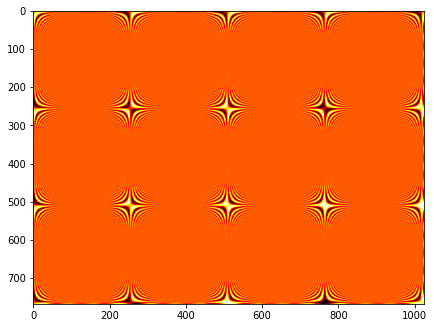

In [442]:
X, Y = np.meshgrid(np.arange(0,1024), np.arange(0, 768))
data = np.sin(X*Y/40.5)

import matplotlib.pyplot as plt
import matplotlib.cm as cm
fig = plt.figure(1, figsize=(7, 6))
plt.imshow(data, cmap=cm.hot, interpolation="bicubic")
plt.show()

# Saving and loading
NumPy makes it easy to save and load `ndarray`s in binary or text format.

## Binary `.npy` format
Let's create a random array and save it.

In [443]:
# 要保存的数据
a = np.random.rand(2,3)
a

array([[0.261068  , 0.48410044, 0.72846104],
       [0.29543287, 0.98834738, 0.69588962]])

In [444]:
# 保存到文件
np.save("my_array", a)

Done! Since the file name contains no file extension was provided, NumPy automatically added `.npy`. Let's take a peek at the file content:

In [445]:
# 直接用python文件API读回的是二进制
with open("my_array.npy", "rb") as f:
    content = f.read()

content

b"\x93NUMPY\x01\x00v\x00{'descr': '<f8', 'fortran_order': False, 'shape': (2, 3), }                                                          \n\x16)\xdb\x8fV\xb5\xd0?\x8cM\xcef\x80\xfb\xde?\xcf\xca\x81\x84\x8dO\xe7?>\xb8\x13I_\xe8\xd2?A\x7f\xf2\xae\x8a\xa0\xef?\xec\x18\xfdM\xbaD\xe6?"

To load this file into a NumPy array, simply call `load`:

In [446]:
# 用np.load读回的才是解析好的np.array
a_loaded = np.load("my_array.npy")
a_loaded

array([[0.261068  , 0.48410044, 0.72846104],
       [0.29543287, 0.98834738, 0.69588962]])

## Text format
Let's try saving the array in text format:

In [447]:
# 要保存的数据
a

array([[0.261068  , 0.48410044, 0.72846104],
       [0.29543287, 0.98834738, 0.69588962]])

In [449]:
# 保存成csv格式
np.savetxt("my_array.csv", a)

Now let's look at the file content:

In [450]:
# python原生APi读取csv，得到的是csv的原始格式
with open("my_array.csv", "rt") as f:
    print(f.read())

2.610680012554821294e-01 4.841004375423032524e-01 7.284610355403290383e-01
2.954328740733024317e-01 9.883473793924865136e-01 6.958896182266278707e-01



This is a CSV file with tabs as delimiters. You can set a different delimiter:

In [451]:
# 要保存的数据
a

array([[0.261068  , 0.48410044, 0.72846104],
       [0.29543287, 0.98834738, 0.69588962]])

In [453]:
# 指定分隔符保存到.csv文件中（load时会用到)
np.savetxt("my_array.csv", a, delimiter=",")

To load this file, just use `loadtxt`:

In [176]:
# 从csv中load回np.array
a_loaded = np.loadtxt("my_array.csv", delimiter=",")
a_loaded

array([[ 0.41307972,  0.20933385,  0.32025581],
       [ 0.19853514,  0.408001  ,  0.6038287 ]])

## Zipped `.npz` format
It is also possible to save multiple arrays in one zipped file:

In [455]:
# 要保存的数据
b = np.arange(24, dtype=np.uint8).reshape(2, 3, 4)
b

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]], dtype=uint8)

In [456]:
# 用压缩包npz的格式保存
np.savez("my_arrays", my_a=a, my_b=b)

Again, let's take a peek at the file content. Note that the `.npz` file extension was automatically added.

In [457]:
# 用python原生API读取npz得到的是二进制格式
with open("my_arrays.npz", "rb") as f:
    content = f.read()
repr(content)[:180] + "[...]"

'b"PK\\x03\\x04\\x14\\x00\\x00\\x00\\x00\\x00\\x93%\\xd0N(uw\\xce\\xb0\\x00\\x00\\x00\\xb0\\x00\\x00\\x00\\x08\\x00\\x00\\x00my_a.npy\\x93NUMPY\\x01\\x00v\\x00{\'descr\': \'<f8\', \'fortran_order\': False, \'shape\':[...]'

You then load this file like so:

In [458]:
# 用numpy的APi读回数据
my_arrays = np.load("my_arrays.npz")
my_arrays

This is a dict-like object which loads the arrays lazily:

In [459]:
my_arrays.keys()

KeysView(<numpy.lib.npyio.NpzFile object at 0x7f26b2cab5f8>)

In [460]:
my_arrays["my_a"]

array([[0.261068  , 0.48410044, 0.72846104],
       [0.29543287, 0.98834738, 0.69588962]])

# What next?
Now you know all the fundamentals of NumPy, but there are many more options available. The best way to learn more is to experiment with NumPy, and go through the excellent [reference documentation](http://docs.scipy.org/doc/numpy/reference/index.html) to find more functions and features you may be interested in.